# Prueba Fundamentos de Data Science - Desafío 1

### Alumno: Jonathan Varas Muñoz

### Profresores: Alfonso Tobar, Sebastian Ulloa

### Generación: G47

---

# Preliminares y Aspectos computacionales

## **1- Descripción del problema**

Nos encontramos trabajando en un organismo no gubernamental el cuál está interesado en las dinámicas socioeconómicas que determinan la desigualdad de ingreso y erradicación de la pobreza extrema.

Nuestro objetivo es desarrollar un modelo predictivo que nos diga si un individuo presentará salarios por sobre o bajo los 50.000 dólares anuales, entregándonos una serie de atributos
sociodemográfico.

Para armar el modelo, nos entregan una base de datos llamada income-db.csv, la cuál está en formato de valores separados por coma. Los atributos disponibles en esta Base de Datos son:

* age: Edad del individuo.

* workclass: Naturaleza de la organización que emplea al individuo.

* education: Nivel educacional del individuo.

* capital-gains: Ingresos generados por inversiones fuera del trabajo asalariado = Ingresos generados por inversiones fuera del trabajo asalariado.

* capital-losses: Pérdidas generadas por inversiones fuera del trabajo asalariado.

* fnlwgt: Ponderador muestral.

* marital-status: Estado civil del individuo.

* occupation: Ocupación del individuo.

* relationship: Relación respecto a su familia.

* race: Raza del encuestado.

* sex: Sexo del encuestado.

* hours-per-week: Cantidad de horas trabajadas por semana.

* native-country: País de origen.

* income: Si el individuo presenta ingresos inferiores a 50.000 dólares anuales, marca <=50K, de lo contrario >50K.


Nuestra variable objetivo será ***income***, ya que nos piden predecir si la persona tendrá salarios por sobre o bajo los 50k. Como no nos están pidiendo predecir un monto en específico y
solamente decir si la persona presenta valores inferiores o mayores a 50k, consideraremos a nuestra variable como discreta, por lo tanto, nuestro modelo será desarrollado como **Modelo de Clasificación**, siendo esto así, la modelación será de **Regresión Logística**, utilizando el método **Logit de Statsmodel** para modelar de manera **descriptiva** y el método **LogisticRegression de sklearn** para
armar nuestro **modelo predictivo**.

### **1.1- Métricas**

Para medir el **desempeño de nuestro Modelo de Clasificación predictivo**, utilizaremos **Validación Cruzada** con **KFolds**, en el cual pediremos que nos retorne lo siguiente:

* Accuracy de cada Fold, los cuales serán promediados. Con el Accuracy medimos la exactitud de nuestro modelo. Casos predichos del total de observaciones.

* Área bajo la curva ROC: Obtendremos el Área bajo la curva para contrastarlo con un modelo aleatorio, teniendo un criterio de corte de .5

Justificación: Se utilizaran métricas como Acurracy, F1 score y Área bajo la curva ROC, porque al ser un Modelo de Clasificación y no de Regresión Líneal, no nos entrega un R cuadrado o Error cuadrático medio para medir, si no más bien, medimos a partir de la cantidad de verdaderos positivos, falsos positivos, verdaderos negativos ... etc.

No realizaremos una medición del **modelo de clasificación desde la Econometría(descriptiva)**, si no más bien, una depuración de este, eliminando las variables atributos con un p-value mayor a 0.05.

Para tener en consideración: 

> Solo obtendremos el área bajo la curva ROC del mejor modelo por temas de costos computacionales.

---

## **2- Aspectos Computacionales**

A continuación, presentamos las librerías que utilizaremos para:
 
#### **Ingesta de datos**

In [1]:
import pandas as pd # Libería orientada al uso de datos, el cual nos permite ingestar data, manipular data, exportar data ... etc.

#### **Preprocesamiento**

In [2]:
from feature_engine.encoding import OneHotEncoder, OrdinalEncoder # Libreria utilizada para transformar variables categoricas en números. OneHot: Columnas, Ordinal: Números con orden de importancia o arbitrario
from feature_engine.imputation import CategoricalImputer, MeanMedianImputer # Librería para procesar datos nulos, imputamos por moda con Categorical y por media con MeanMedian
from feature_engine.wrappers import SklearnTransformerWrapper # Librería que transformar array numpy en DataFrame
from sklearn.pipeline import Pipeline # Librería que nos permite armar una línea de pasos continuos para ayudarnos en el orden de nuestro pre procesamiento
import numpy as np # Librería que nos permite manejar datos númericos y condiciones para transformar variables categoricas con where a variables binarias(1 y 0)
from sklearn.preprocessing import StandardScaler # Librería que nos permite estandarizar variables númericas, esto nos ayuda a mejorar la Multicolinealidad y el desempeño de nuestro modelo
from sklearn import set_config

set_config(display='diagram')

#### **Visualización**

In [3]:
import matplotlib.pyplot as plt # Librería que nos ayudará a visualizar las variables tanto continuas como categoricas y además dispersión entre dos variables.
import seaborn as sns # Librería que nos ayudará a visualizar variables. La cual está construida a partir de matplotlib.
import missingno as msngo # Librería para inspeccionar valores perdidos.

#### **Modelación**

In [4]:
from sklearn.linear_model import LogisticRegression # Librería que nos permite armar nuestro modelo predictivo.
import statsmodels.api as sm # Librería que nos permite armar y exponer nuestro modelo descriptivo desde la Econometría.

#### **Evaluación**

In [5]:
from sklearn.model_selection import cross_val_score # Librería para medir mediante validación cruzada con KFolds.

### **2.1- Detalles del proceso de recodificación e ingeniería de atributos**

En esta sección veremos como se tratarán las variables que contengan valores perdidos y la recodificación a petición de la organización. Además, veremos la solución de como trataremos
nuestras variables al momento de realizar los modelos descriptivos y predictivos.

#### **2.1.1- Trato de valores perdidos**

Nos avisan previamente que los valores perdidos se encuentran establecidos como un string "?", al estar de esa forma, no podemos tratar los datos perdidos como NaN y esto genera un problema,
ya que no nos permite utilizar librerías de imputación o métodos de Pandas para el trato de estos. Por lo tanto, utilizaremos una función que recorra todas las columnas y que trabaje
a nivel vectorial, reemplazando los valores "?" por valores NaN de numpy.

#### **2.1.2- Recodificaciones**

Nos piden recodificar las siguientes variables con sus respectivas nomenclaturas, en cada una de ellas se utilizará una función que trabaje a nivel vectorial para facilitar el proceso:

> Tener en consideración: Los valores entre corchetes corresponden al valor que se encuentra en el vector y antes de los dos puntos, es como debería quedar.

* *occupation* : 

    - white-collar: [Prof-specialty, Exec-managerial, Adm-Clerical, Sales, Tech-support]

    - blue-collar: [Crafr-repair, Machine-op-inspct, Transport-moving, Handlers-cleaners, Farming-fishing, Protective-serv, Priv-house-serv]

    - others: [Other-service, Armed-forces]

* *workclass* : recodificar columna como workclass_recod

    - federal-gov : [Federal-gov.]

    - state-level-gov : [State-gov, Local-gov.]

    - self-employed : [Self-emp-inc, Self-emp-not-inc]

    - unemployed :[ Never-worked, Without-pay.]

* *education*: recodificar columna como educ_recod con los siguientes valores

    - preschool : [Preschool]

    - elementary-school : [1st-4th, 5th-6th]

    - high-school : [7th-8th, 9th, 10th,11th, 12th, HS-grad]

    - college : [Assoc-voc, Assoc-acdm, Some-college]

    - university : [Bachelors, Masters, Prof-school, Doctorate.]

* *marital-status*: recodificar columna como civstatus

    - married : [Married-civ-spouse, Married-spouse-absent, Married-AF-spouse.]

    - divorced : [Divorced.]

    - separated : [Separated.]
    
    - widowed : [Widowed.]

* native-country: recodificar como region y a cada país asignarle su respectivo continente.

* income: recodificar de forma binaria.

#### **2.1.3- Solución de recodificación:**

* Para los valores donde debemos recodificar siguiendo una nomenclatura, crearemos una función a nivel vectorial. A esta función, le ingresaremos un diccionaro con listas, cada valor
corresponderá a como debe quedar la variable en el vector y en cada uno de estos una lista donde preguntaremos si el valor se encuentra. Ejemplo con la columna *marital-status*: 

        Tomamos la observación con un valor Married-spouse-absent, nuestra función recorrerá los keys del diccionario, preguntando si el valor se encuentra en la lista de cada key, cuando la encuentre, se   cambiará el valor antiguo por la clave del diccionario, quedando "married" en vez de "Married-civ-spouse".

* Posterior a la solución de recodificación de la nomenclatura de las variables, procederemos a recodificar el nombre de las columnas con el método rename de pandas de forma manual, las columnas
quedarían de la siguiente manera:

    - workclass -> workclass_recod

    - education -> educ_recod

    - marital-status -> civstatus

* Para solucionar *native-country* utilizaremos la misma función de cambio de nomenclatura, ingresando un diccionario que contenga a cual continente pertenece cada país.

* Para solucionar la recodificación de income como forma binaria, utilizaremos numpy where, dejando 1 si cumple la condición y 0 si no la cumple.

* Para renombrar columnas, lo haremos de maneral manual con pandas.

* Las variables categóricas serán llevarán a números al momento de modelar, porque si realizamos esta acción antes, dificultará la interpretacion al momento de visualizar con gráficos.

#### **2.1.4- Preprocesamiento en la modelación descriptiva y predictiva**

Para los valores perdidos, utilizaremos librerías y métodos de imputación, en el cuál, las variables categóricas las imputaremos por moda con el método CategoricalImputer y para las variables continuas
imputaremos con el método MeanMedianImputer.

Luego de realizar la imputación, las variables categóricas las pasaremos a numéricas con los métodos OneHotEncoder y OrdinalEncoder. Si la data indica que hay un orden en la categoría, utilizamos
OrdinalEncoder, si no, utilizamos OneHotEncoder. 

Finalmente, una vez que pasamos nuestras variables categóricas a numéricas, procederemos a escalar las variables con StandarScaler(), para así, ir evaluando si esto mejora nuestro modelo
predictivo.

#### **2.1.5- Funciones generadas y su objetivo**


---

In [6]:
import utility_funcs as ut

print(ut.info_utilidades_desafio1.__doc__)


    obs_perdidas
    Función que retorna la cantidad de datos perdidos de un vector. Se puede imprimir la lista al ingresar True como parámetro en print_list    

    countplot_sns
    Función que crea un gráfico countplot de seaborn.

    histplot_sns
    Función que crea un gráfico histplot de seaborn.

    histplot_log
    Función que crea un gráfico histplot de seaborn, pero aplicando logaritmo.

    change_nomenclature    
    Función que reemplaza la nomenclatura de datos dentro de un Vector Serie Pandas a través de un diccionario ingresado.
    


# **3- Descripción**

Sección donde generaremos el análisis descriptivo y visual de la variables, tendremos en consideración si estas son de tipo continua o discreta, además, partiremos implementando la solución a las
recodificaciones de nomenclaturas planteadas anteriormente, para luego realizar una inspección visual de nuestra variables objetivo y de las variables atributos.

### 3.1 Implementando solución al trato de valores perdidos, recodificación de valores en columnas, cambio en el nombre de columnas y binarización de nuestra variable objetiva (income)

#### 3.1.1 Trato de valores perdidos

Para tratar los valores perdidos, utilizaremos la función replace_nullstring, la cual se encuentra en el archivo utility_funcs.py.

In [7]:
df = pd.read_csv('income-db.csv')

for column in df: # Recorremos todas las columnas del dataframe y aplicamos la función replace null string, el cuál busca el valor que demos como argumento y lo reemplaza por null.
    df[column] = ut.replace_nullstring(df, column, '?')

> Comprobamos en dos columnas

In [8]:
print('Solicitamos valores nulos en las dos columnas')
print('')
print(df['workclass'].isna().value_counts())
print(df['occupation'].isna().value_counts())
print('')
print('Solicitamos si existe algun valor "?"')
print('')
print(df[df['workclass']=='?'])
# Nos entrega Empty DataFrame, comprobando que no quedan valores '?' y solamente valores NaN de numpy.

Solicitamos valores nulos en las dos columnas

False    46043
True      2799
Name: workclass, dtype: int64
False    46033
True      2809
Name: occupation, dtype: int64

Solicitamos si existe algun valor "?"

Empty DataFrame
Columns: [age, workclass, fnlwgt, education, educational-num, marital-status, occupation, relationship, race, gender, capital-gain, capital-loss, hours-per-week, native-country, income]
Index: []


#### 3.1.2 Recodificación de valores en columnas siguiendo nomenclatura solicitada

Para realizar la recodificación, trabajaremos en un nuevo dataframe, el cual tendrá por nombre df_recod, haciendo referencia a que es un dataframe recodificado, conservando en df nuestra data original, luego creamos diccionarios que corresponden a cada columna donde se realizará el cambio, en el cuál, a cada clave del diccionario se le asigna una lista con los valores que ya existen en dicha columna.

La función change_nomenclature, toma la observación y la busca por cada key y lista que se encuentra en el diccionario, si llega a hacer match en una de las listas, reemplaza el valor por la key.

In [9]:
df_recod = df.copy() # Copiamos nuestro dataframe original en uno nuevo

# Diccionarios que contienene Listas para hacer match con la observación

dict_workclass = {
    'federal-gov':['Federal-gov'],
    'state-level-gov':['State-gov','Local-gov'],
    'self-employed':['Self-emp-inc','Self-emp-not-inc'],
    'unemployed':['Never-worked','Without-pay'],
    'private':['Private']
}

dict_occupation = {
    'white-collar':['Prof-specialty','Exec-managerial','Adm-clerical','Sales','Tech-support'],
    'blue-collar':['Craft-repair', 'Machine-op-inspct', 'Transport-moving', 'Handlers-cleaners', 'Farming-fishing', 'Protective-serv', 'Priv-house-serv'],
    'others':['Other-service', 'Armed-Forces']
}

dict_education = {
    'preschool':['Preschool'],
    'elementary-school':['1st-4th','5th-6th'],
    'high-school':['7th-8th','9th','10th','11th','12th','HS-grad'],
    'college':['Assoc-voc','Assoc-acdm','Some-college'],
    'university':['Bachelors','Masters','Prof-school','Doctorate']
}

dict_marital = {
    'married':['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'],
    'divorced':['Divorced'],
    'separated':['Separated'],
    'widowed':['Widowed'],
    'never-married':['Never-married']
}

# Guam america
# South : South Korea
# Hong: Parte de asia

# No hay registro ni de oceania, ni de africa

dict_continents = {
    'asia':['Philippines','Thailand','Vietnam','Japan','India','Cambodia','Laos','Taiwan','China','Iran','Hong', 'South'],
    'america':['United-States','Peru','Guatemala','Mexico','Dominican-Republic','Haiti','El-Salvador',
    'Puerto-Rico','Columbia','Cuba','Canada','Nicaragua','Honduras','Jamaica','Ecuador','Trinadad&Tobago','Outlying-US(Guam-USVI-etc)'],    
    'europa':['Ireland','Germany','Poland','England','Italy','Portugal','Scotland','Yugoslavia','Hungary','Greece','France','Holand-Netherlands'],    
}

# Recodificación utilizando función change_nomenclature

df_recod['workclass'] = ut.change_nomenclature(df_recod, 'workclass', dict_workclass)
df_recod['occupation'] = ut.change_nomenclature(df_recod, 'occupation', dict_occupation)
df_recod['education'] = ut.change_nomenclature(df_recod, 'education', dict_education)
df_recod['marital-status'] = ut.change_nomenclature(df_recod, 'marital-status', dict_marital)
df_recod['native-country'] = ut.change_nomenclature(df_recod, 'native-country', dict_continents)

**Comprobamos el cambio de nomenclatura en dos columnas**

In [10]:
print('Valores únicos en columna workclass del DataFrame recodificado.')
print('')
print(df_recod['workclass'].unique())
print('')
print('Valores únicos originales')
print('')
print(df['workclass'].unique())

Valores únicos en columna workclass del DataFrame recodificado.

['private' 'state-level-gov' nan 'self-employed' 'federal-gov'
 'unemployed']

Valores únicos originales

['Private' 'Local-gov' nan 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


**Comprobamos la asignación de países a continentes**

In [11]:
print('Valores únicos en columna native-country del DataFrame recodificado.')
print('')
print(df_recod['native-country'].unique())
print('')
print('Valores únicos originales')
print('')
print(df['native-country'].unique())

Valores únicos en columna native-country del DataFrame recodificado.

['america' nan 'europa' 'asia']

Valores únicos originales

['United-States' nan 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador'
 'Puerto-Rico' 'Vietnam' 'South' 'Columbia' 'Japan' 'India' 'Cambodia'
 'Poland' 'Laos' 'England' 'Cuba' 'Taiwan' 'Italy' 'Canada' 'Portugal'
 'China' 'Nicaragua' 'Honduras' 'Iran' 'Scotland' 'Jamaica' 'Ecuador'
 'Yugoslavia' 'Hungary' 'Hong' 'Greece' 'Trinadad&Tobago'
 'Outlying-US(Guam-USVI-etc)' 'France' 'Holand-Netherlands']


#### 3.1.3 Recodificación del nombre de las columnas

In [12]:
df_recod.rename(columns={'workclass':'workclass_recod','education':'educ_recod','marital-status':'civstatus','native-country':'region'}, inplace=True)

#### 3.1.3 Recodificación Binaria de nuestra **variable objetivo**

En la recodificación binaria de Income, asignaremos con un 1 a los individuos con ingresos superiores a 50.000 dólares(>50K) y con un 0 con ingresos inferiores a 50.000 dólares(<=50K)

In [13]:
df_recod['income'] = np.where(df['income']=='>50K', 1, 0)

Comprobamos

In [14]:
df_recod['income'].value_counts()

0    37155
1    11687
Name: income, dtype: int64

In [15]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

#### Desde ahora, nos referiremos a la Clase 1 y 0 de la siguiente manera:

### **Clase 1: Ingresos Inferiores a 50.000 dólares anuales.**

### **Clase 0: Ingresos Inferiores a 50.000 dólares anuales.**

### 3.2- Inspección general de las variables

Una vez que ya tenemos todas las variables recodificadas, procedemos a inspeccionar nuestras variables y a realizar descripciones visuales de estas

In [16]:
df_recod.dtypes

age                float64
workclass_recod     object
fnlwgt             float64
educ_recod          object
educational-num    float64
civstatus           object
occupation          object
relationship        object
race                object
gender              object
capital-gain       float64
capital-loss       float64
hours-per-week     float64
region              object
income               int32
dtype: object

Comentarios:

Nuestro dataframe cuenta con 15 columnas, de las cuales 9 son categóricas y otras 6 son continuas. Contamos como categórica a nuestra variable objetivo ya que nos está señalando mediante
números a que grupo pertenece. Por ahora, para realizar un análisis descriptivo y visual, aún no recodificamos las variables categóricas en números, esto se realizará más adelante con librerías, para
así, facilitar el modelamiento descriptivo y predictivo.

In [17]:
df_recod.describe().drop(columns=['income']) # Dropeamos income porque no la consideramos númerica

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Comentarios:

La columna age nos indica que la persona más joven en nuestra data tiene 17 años y la máxima 90. Si nos fijamos en nuestra desviación estándar, la cual es de 17, nos estaría indicando que
este valor mínimo y máximo serían outliers, ya que escapan de la media, la cual es 38 y si restamos 17, nos daría 21, por lo tanto los valores que se encuentren por debajo, serían valores
outliers, así mismo, el límite superior sería de 55(38+17), por lo que también contamos con valores que se escapan de la media.

capital-gain y capital-loss presentan valores bastantes especiales, por el hecho de que sus valores mínimos son 0 y si a la media le restamos la desviación estándar, estarían abajo de 0. Esto nos
podría indicar que hay un sesgo a hacía valores bajos, pero que la data cuenta con valores extremadamente altos.

hours-per-week nos dice que la media del trabajo alrededor de todo el mundo es 40, por lo que no estaría escapando de lo real, ya que sabemos que alrededor del mundo en promedio se trabaja esta cantidad
de horas. Si bien, hablamos de la media como un valor normal de horas de trabajo, también nos podemos fijar en el valor máximo, el cuál es 99, esto nos podría estar indicando una desigualdad y para
comprobar este análisis lo verificaremos mediante código:

In [18]:
df[df['hours-per-week']> 60]['income'].value_counts()

<=50K    1077
>50K      599
Name: income, dtype: int64

Se nota claramente una desigualdad al buscar la cantidad de personas que trabaja por sobre 60 horas, ya que si bien presentan muchas horas trabajadas, igualmente presentan un sueldo menor a los 
50.000 dólares anuales(Clase 0), por lo que existe una sobre explotación y además una remuneración baja para la cantidad de horas trabajadas.

> El análisis descriptivo de las variables categóricas lo realizaremos mediante inspección visual al igual que las continuas

#### 3.2.1 Inspección visual de la variable objetivo

Al ser una variable discreta, inspeccionaremos con un Countplot, para contar las clases dentro de la **variable objetivo income**.

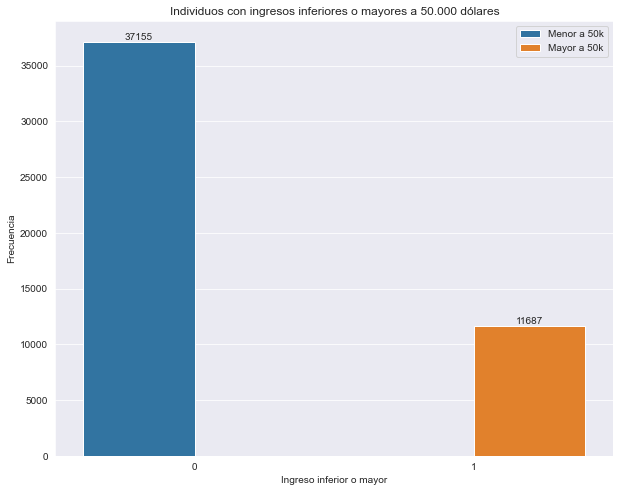

In [19]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,8))
ax = sns.countplot(data=df_recod, x='income', hue='income')
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
plt.title('Individuos con ingresos inferiores o mayores a 50.000 dólares')
plt.ylabel('Frecuencia')
plt.xlabel('Ingreso inferior o mayor')
plt.legend(labels=['Menor a 50k', 'Mayor a 50k']);

**Comentarios:**

Se observa un claro desbalance en las Clases, ya que la Clase 0 que corresponde a ingresos menores a 50.000 dólares anuales cuenta con 37.155 individuos, en cambio la Clase 1 que corresponde a ingresos mayores a 50.000 dólares anuales cuenta con 11.687 individuos. Observemos en valores porcentuales:

In [20]:
print(f'Porcentaje de clase con Ingreso menor a 50.000: {round(df_recod["income"].value_counts(normalize=True)[0], 2)*100}%')
print('')
print(f'Porcentaje de clase con Ingreso mayor a 50.000: {round(df_recod["income"].value_counts(normalize=True)[1], 2)*100}%')

Porcentaje de clase con Ingreso menor a 50.000: 76.0%

Porcentaje de clase con Ingreso mayor a 50.000: 24.0%


Entre las dos clases hay una diferencia del 52%, esto nos indicaria que al momento de modelar, las predicciones presentarán mayor desempeño en la Clase 0 que en la Clase 1. Igualmente, más adelante,
al momento de modelar, mediremos el desempeño y confirmaremos si nuestro análisis es correcto.

#### 3.2.2 Inspección visual de variables categóricas

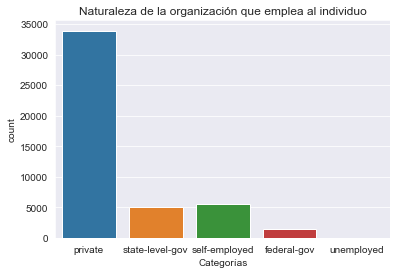

In [21]:
ut.countplot_sns(df_recod, 'workclass_recod', 'Naturaleza de la organización que emplea al individuo')

**Comentarios:**

Observamos un claro desbalance en las categorías de workclass_recod, indicandonos que mayormente hay más individuos que trabajan en organizaciones privadas.

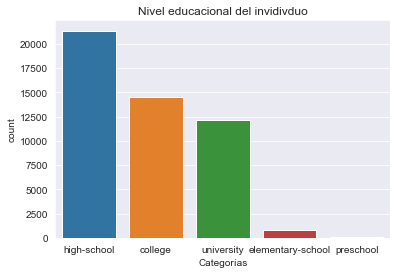

In [22]:
ut.countplot_sns(df_recod, 'educ_recod', 'Nivel educacional del invidivduo')

**Comentarios:**

El gráfico nos indica que la mayoría de los individuos terminó su educación a nivel de colegio y que una minoría solamente llegó a la escuela básica o al pre-escolar.

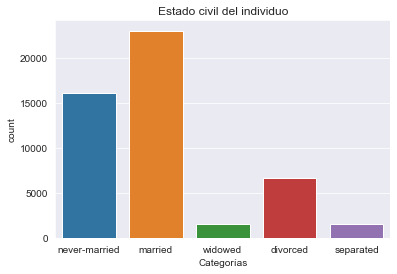

In [23]:
ut.countplot_sns(df_recod, 'civstatus', 'Estado civil del individuo')

**Comentarios:**

Contamos con una mayor cantidad de individuos casados o que estuvieron casados, a individuos que nunca lo estuvieron.

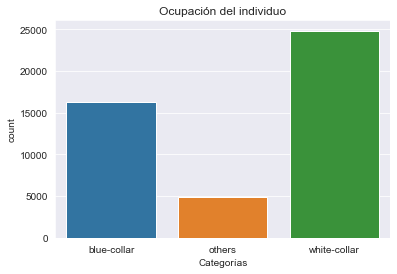

In [24]:
ut.countplot_sns(df_recod, 'occupation', 'Ocupación del individuo')

**Comentarios:**

Según el gráfico, contamos con una mayor cantidad de individuos que trabajan en la jerarquía superior de las empresas, quizás esto podría provocar que la categoría al ser white-collar aumente la probabilidad de que el individuo tenga un ingreso superior a los 50.000 dólares anuales, ya que asumimos que al estar en una jerarquía mayor en la empresa, esta persona generará más ingresos.

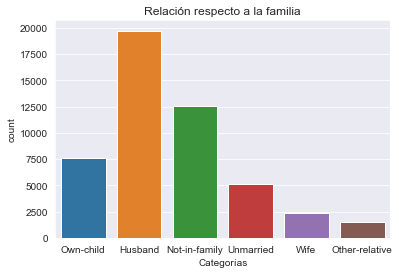

In [25]:
ut.countplot_sns(df_recod, 'relationship', 'Relación respecto a la familia')

**Comentarios:**

Contamos con una mayor cantidad de individuos que son esposos, por ende podemos asumir también que hay una mayor cantidad de hombres dentro de la data. Esto lo analizaremos en unos gráficos más adelante.

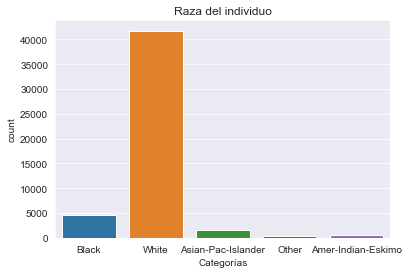

In [26]:
ut.countplot_sns(df_recod, 'race', 'Raza del individuo')

**Comentarios:**

A simple vista, observamos que hay un fuerte sesgo hacía individuos que son de raza blanca.

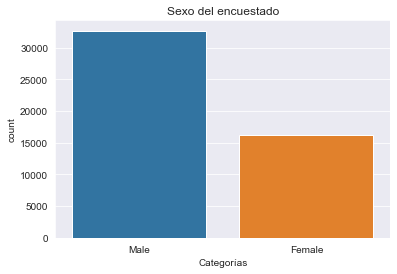

In [27]:
ut.countplot_sns(df_recod, 'gender', 'Sexo del encuestado')

**Comentarios:**

Mediante este gráfico, confirmamos el análisis realizado en la visualización de la variable "relationship", confirmando que hay una mayor cantidad de individuos hombres que mujeres. 

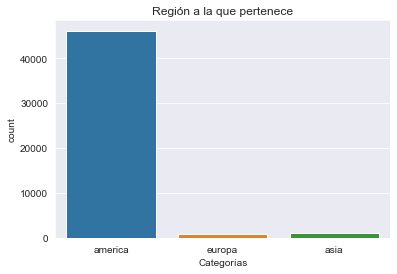

In [28]:
ut.countplot_sns(df_recod, 'region', 'Región a la que pertenece')


**Comentarios:**

A priori, podemos decir que hay un fuerte sesgo hacía individuos que viven en América dentro del DataSet.

#### 3.2.3 Inspección visual de variables continuas

Obtenemos variables que son continuas con un for en dtypes del DataFrame

In [29]:
for key, item in df_recod.dtypes.items():
    if item == 'float64':
        print(key)

age
fnlwgt
educational-num
capital-gain
capital-loss
hours-per-week


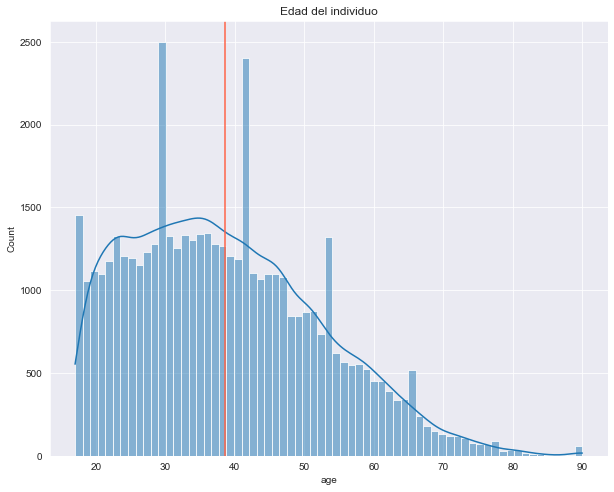

In [30]:
ut.histplot_sns(df_recod, 'age', 'Edad del individuo')

**Comentarios:**

Observando el gráfico, nos damos cuenta que hay un sesgo hacía individuos menores a 60 años y que mayores a estos, serían datos anómalos.

La línea de color tomato nos estaría indicando que en promedio el DataSet cuenta con individuos de 38 años aproximadamente y la curva de probabilidad nos dice que las variables se están comportando dentro de lo esperado, salvo que cada aproximadamente 10 años, los datos se disparan.

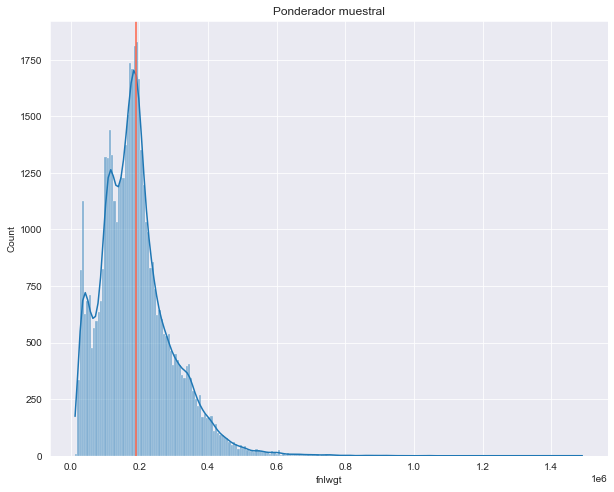

In [31]:
ut.histplot_sns(df_recod, 'fnlwgt', 'Ponderador muestral')

**Comentarios:**

En cuanto al ponderador muestral, existe un claro sesgo hacía valores bajos y que los valores altos estarían siendo anómalos.

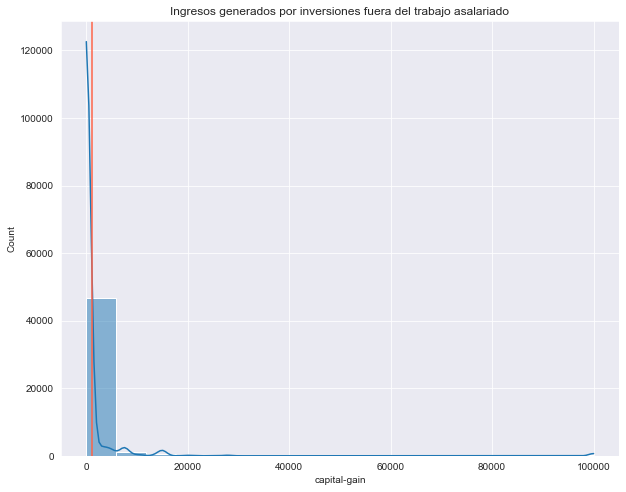

In [32]:
ut.histplot_sns(df_recod, 'capital-gain', 'Ingresos generados por inversiones fuera del trabajo asalariado')

**Comentarios:**

Como analizamos anteriormente, capital-gain cuenta con una mayoría de datos sesgados hacía valores bajos y que a su vez, cuenta con valores muy extremos entre los límites. Para verificar que los datos se están comportando dentro de lo normal con la curva de probabilidad, intentaremos normalizarlos aplicando Logaritmo.

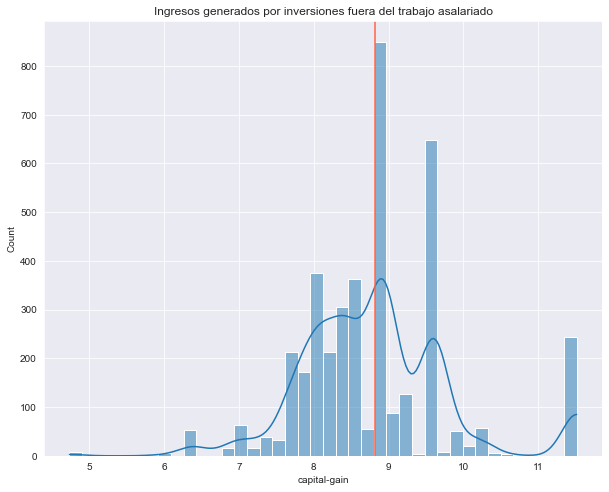

In [33]:
ut.histplot_log(df_recod, 'capital-gain', 'Ingresos generados por inversiones fuera del trabajo asalariado')

**Comentarios:**

Luego de aplicar logaritmo, podemos obtener un panorama mayor de la variable en cuanto a su curva de densidad de probabilidad, dándonos cuenta que la mayoría de los datos se comportan dentro de los esperados, pero que también cuenta con valores muy extremos los cuales se escapan del comportamiento esperado.

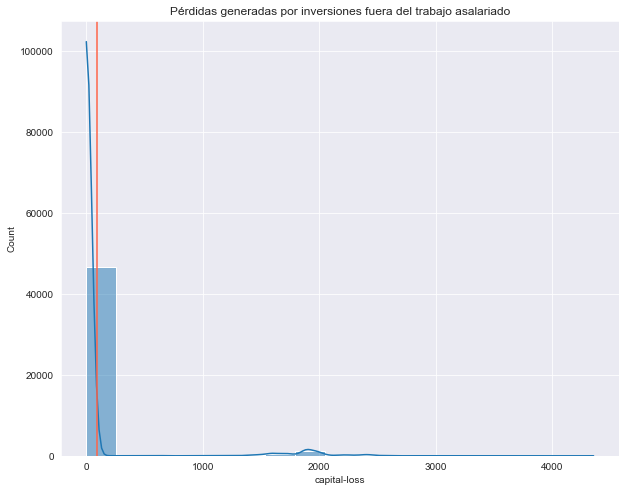

In [34]:
ut.histplot_sns(df_recod, 'capital-loss', 'Pérdidas generadas por inversiones fuera del trabajo asalariado')

**Comentarios:**

Capital-loss se comporta de la misma forma que capital-gain, por lo tanto también aplicaremos logaritmo.

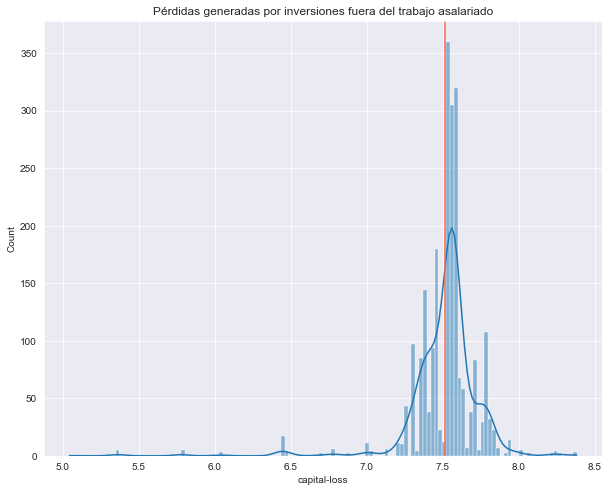

In [35]:
ut.histplot_log(df_recod, 'capital-loss', 'Pérdidas generadas por inversiones fuera del trabajo asalariado')

**Comentarios:**

Al igual que capital-gain, al aplicar logaritmo en capital-loss podemos interpretar mejor la curva de densidad de probabilidad, la cuál nos está indicando que los datos se están comportando dentro de lo esperado, pero con excepción en los datos que se encuentran cercanos a la media, los cuales están muy disparados con respecto al comportamiento esperado.

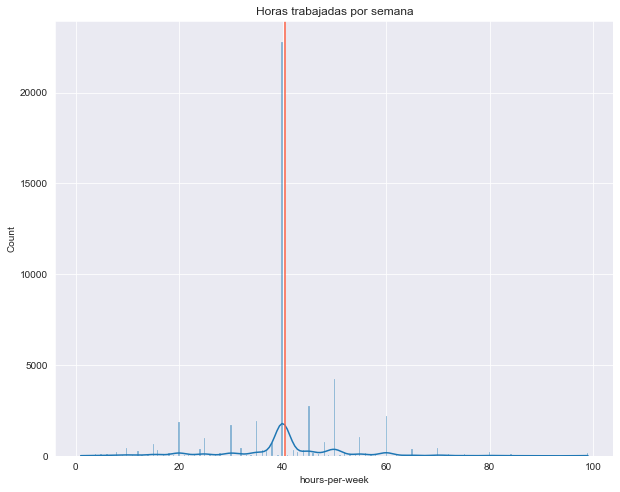

In [36]:
ut.histplot_sns(df_recod, 'hours-per-week', 'Horas trabajadas por semana')

**Comentarios:**

Como analizamos anteriormente, la mayoría de las personas trabajan en promedio 40 horas, por lo que no estábamos equivocados al asumir esta situación, a su vez, existen valores que escapan de lo normal, ya que están muy alejados de la media, obtendremos la desviación estándar para establecer un límite superior y decir desde las cuantas horas escapa de lo normal.

In [37]:
print(f'Desviación estándar de horas trabajadas por semana: {df_recod["hours-per-week"].std():.2f}')

print(f'Límite superior: {df_recod["hours-per-week"].mean()+df_recod["hours-per-week"].std():.2f}')

Desviación estándar de horas trabajadas por semana: 12.39
Límite superior: 52.81


Estableciendo el límite superior, podemos decir que las personas que trabajan mayor a 52 horas semanales estaría fuera de lo normal.

#### 3.2.4 Inspección de las variables perdidas en el DataSet

Para inspeccionar los datos perdidos en nuestro dataframe, contamos con una función llamada 'obs_perdidas', en la cual ingresamos el dataframe, el vector a inspeccionar y este nos retorna la cantidad de casos perdidos y el porcentaje de este, la función también cuenta con una opción que nos permite ver la lista de casos perdidos, por tema de tamaño de la data optaremos por dejar este valor en False, el cual ya está por defecto.

Para facilitar la inspección, realizaremos un for junto con la función para obtener todos los datos perdidos en las columnas.

In [38]:
for column in df_recod:
    ut.obs_perdidas(df_recod, column)

Cantidad de casos perdidos en age: 0, 0.00%
Cantidad de casos perdidos en workclass_recod: 2799, 5.73%
Cantidad de casos perdidos en fnlwgt: 0, 0.00%
Cantidad de casos perdidos en educ_recod: 0, 0.00%
Cantidad de casos perdidos en educational-num: 0, 0.00%
Cantidad de casos perdidos en civstatus: 0, 0.00%
Cantidad de casos perdidos en occupation: 2809, 5.75%
Cantidad de casos perdidos en relationship: 0, 0.00%
Cantidad de casos perdidos en race: 0, 0.00%
Cantidad de casos perdidos en gender: 0, 0.00%
Cantidad de casos perdidos en capital-gain: 0, 0.00%
Cantidad de casos perdidos en capital-loss: 0, 0.00%
Cantidad de casos perdidos en hours-per-week: 0, 0.00%
Cantidad de casos perdidos en region: 857, 1.75%
Cantidad de casos perdidos en income: 0, 0.00%


Comentarios:

Observamos que solo 3 columnas presentan valores perdidos, los cuales son workclass_recod, occupation y region. Más adelante, para la modelación, consideraremos si eliminamos estas columnas o si imputamos por moda o media, según el tipo de dato.

**Inspeccionamos de manera visual**

Realizamos un gráfico de datos perdidos con missingno para inspeccionar de manera visual

<Figure size 288x288 with 0 Axes>

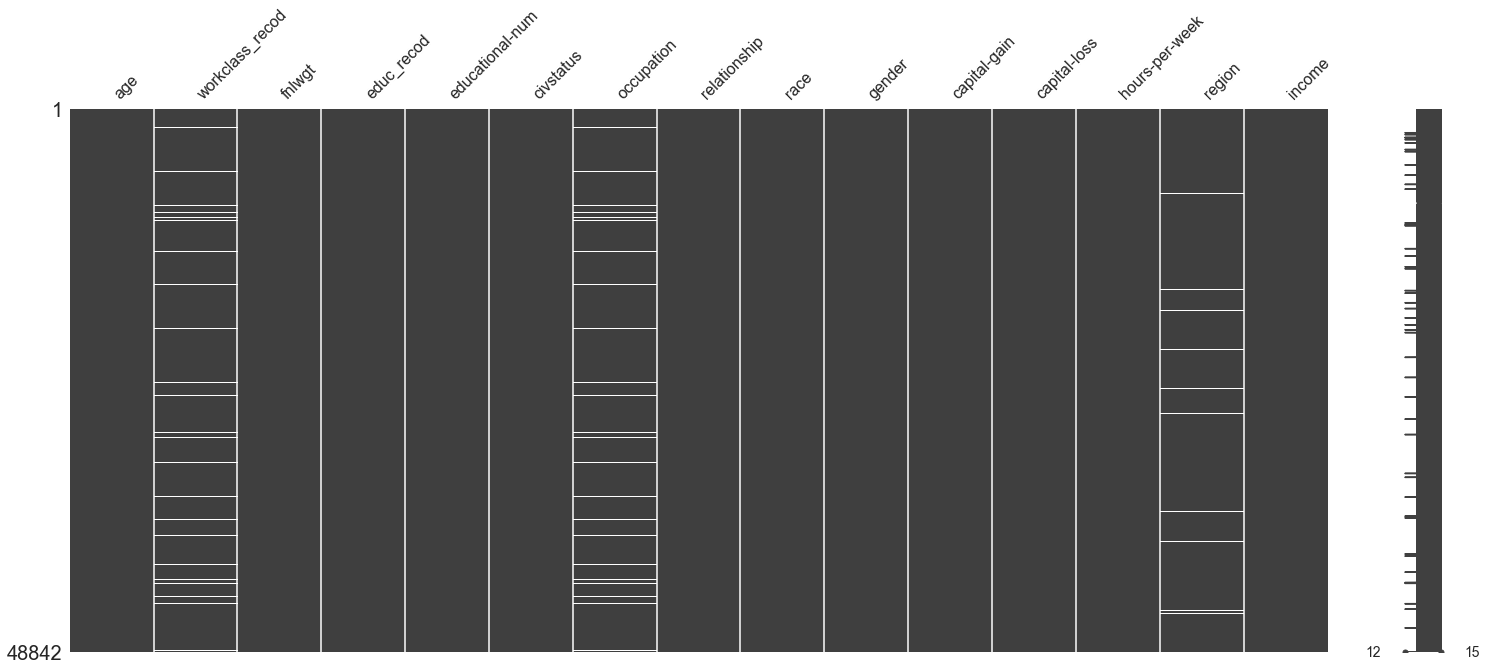

In [39]:
import missingno as msngo

plt.figure(figsize=(4,4))
msngo.matrix(df_recod);

Comentarios:

De manera visual confirmamos que las columnas workclass_recod, occupation y region presentan valores perdidos. A priori se observa que las columnas con mayores datos perdidos son occupation y workclass, una estrategia para tratar estas variables, será imputar por moda, ya que son categóricas, en cuanto a region, tendremos una tentativa de eliminar los valores perdidos, ya que al parecer no son muchos.

#### 3.2.4 Gráficos de regresión logística para contrastar la variable objetivo con variables atributos

En esta sección ya comenzamos a hablar de probabilidades mediante los gráficos de dispersión, ya que estamos ante un Modelo de Clasificación. Utilizaremos lmplot para graficar la probabilidad de la variable objetivo en Y y la variable atributo a contrastar en X

Text(0.5, 1.0, 'Regresión logística entre income y age')

<Figure size 1152x576 with 0 Axes>

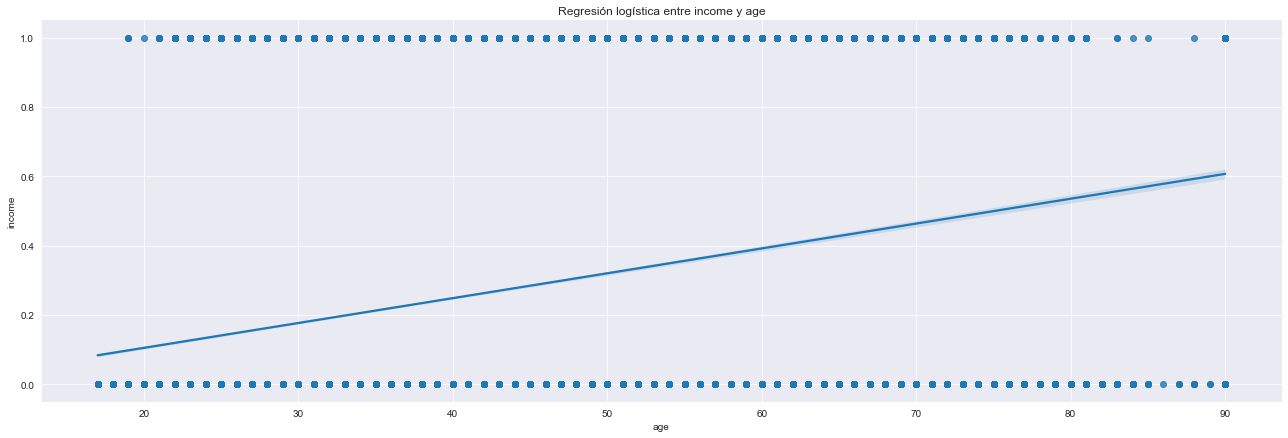

In [40]:
plt.figure(figsize=(16,8))
sns.lmplot(data=df_recod, x='age', y='income', height=6, aspect=3);
plt.title('Regresión logística entre income y age')

Comentarios:

De forma intuitiva observamos que la probabilidad de contar con ingresos anuales mayores a 50.000 dólares aumenta en medida que la edad del individuo aumenta.

<Figure size 1152x576 with 0 Axes>

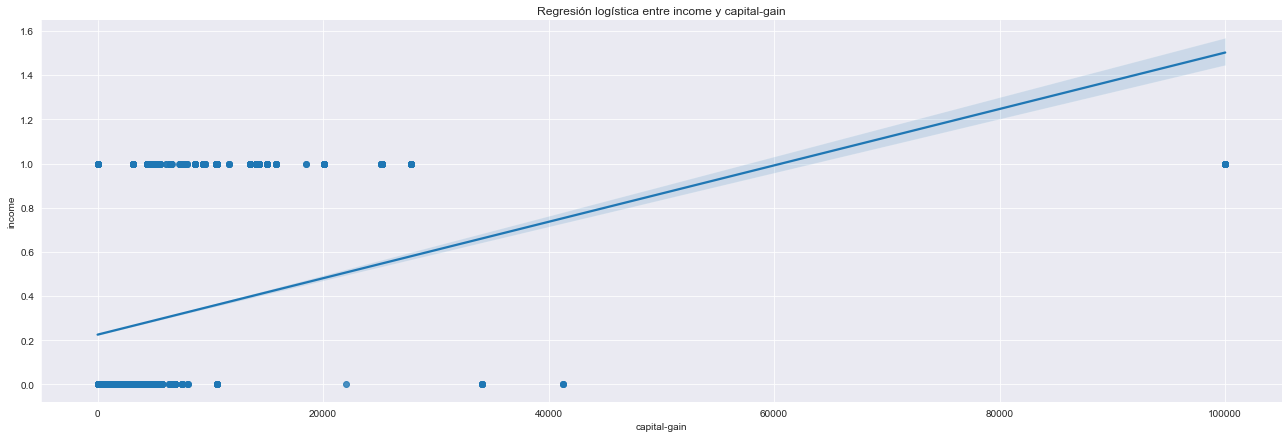

In [41]:
plt.figure(figsize=(16,8))
sns.lmplot(data=df_recod, x='capital-gain', y='income', height=6, aspect=3)
plt.title('Regresión logística entre income y capital-gain');

**Comentarios:**

El gráfico nos dice que con seguridad el individuo tendrá ingresos mayores a 50.000 dólares anuales al generar ingresos por inversiones fuera del trabajo mayores a 60.000 dólares . Si lo pensamos, esto no escapa de lo lógico, ya que si generamos ingresos mayores a 60.000 dólares, obviamente ya estaríamos entrando en el grupo 1.

<Figure size 1152x576 with 0 Axes>

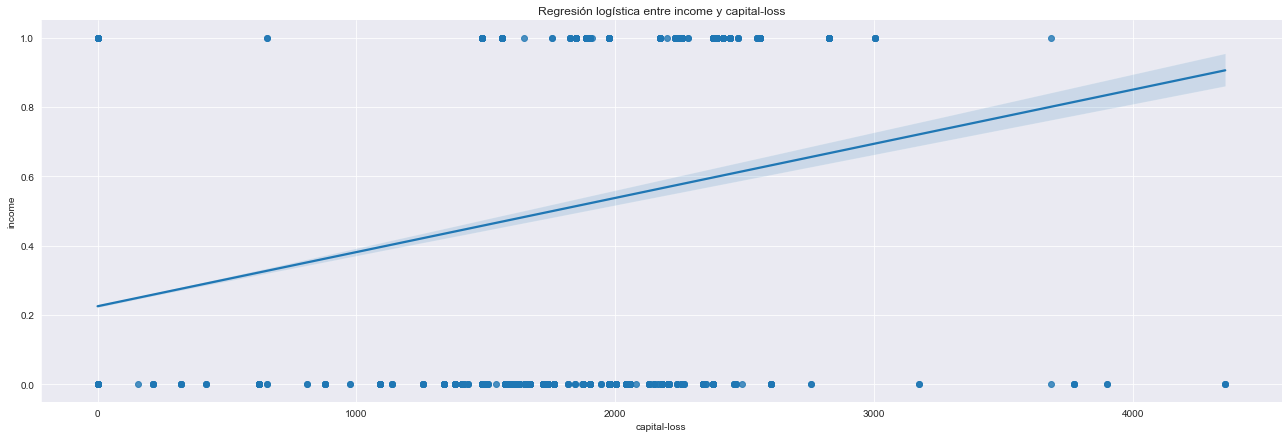

In [42]:
plt.figure(figsize=(16,8))
sns.lmplot(data=df_recod, x='capital-loss', y='income', height=6, aspect=3);
plt.title('Regresión logística entre income y capital-loss');

**Comentarios:**

La probabilidad de generar ingresos mayores a 50.000 dólares aumenta en medida que el individuo pierde ingresos por inversiones fuera del trabajo. Esto puede parecer ilógico, pero si lo pensamos, las personas mientras mayores ingresos generan por inversiones, mayores perdidas tendrán.

<Figure size 1152x576 with 0 Axes>

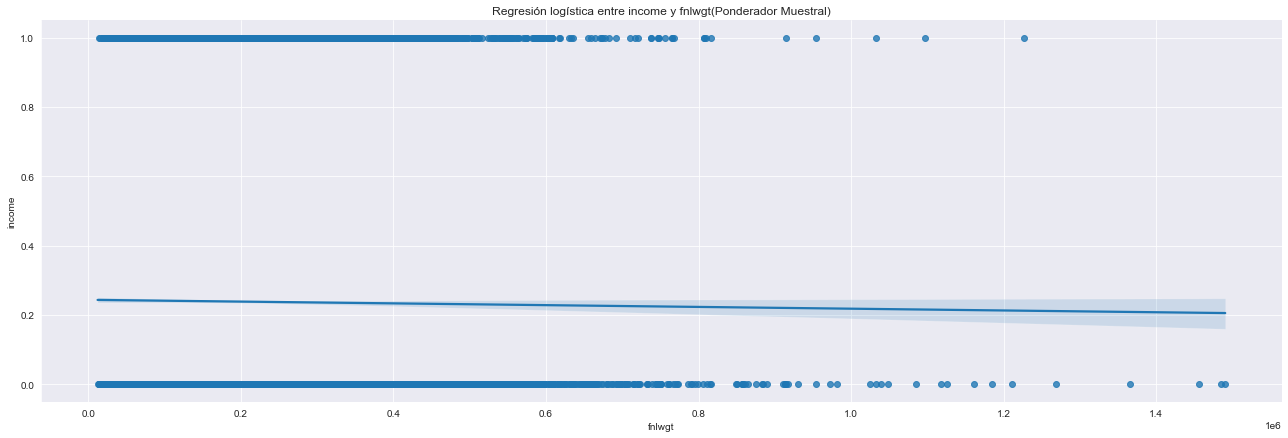

In [43]:
plt.figure(figsize=(16,8))
sns.lmplot(data=df_recod, x='fnlwgt', y='income', height=6, aspect=3);
plt.title('Regresión logística entre income y fnlwgt(Ponderador Muestral)');

**Comentarios:**

De forma intuitiva podemos decir que la probabilidad de generar ingresos mayores a 50.000 dólares anuales se ve afectada muy levemente en medida que el valor del Ponderador Muestral aumenta.

**Análizamos por género**

{'Male': 0, 'Female': 1}

<Figure size 1152x576 with 0 Axes>

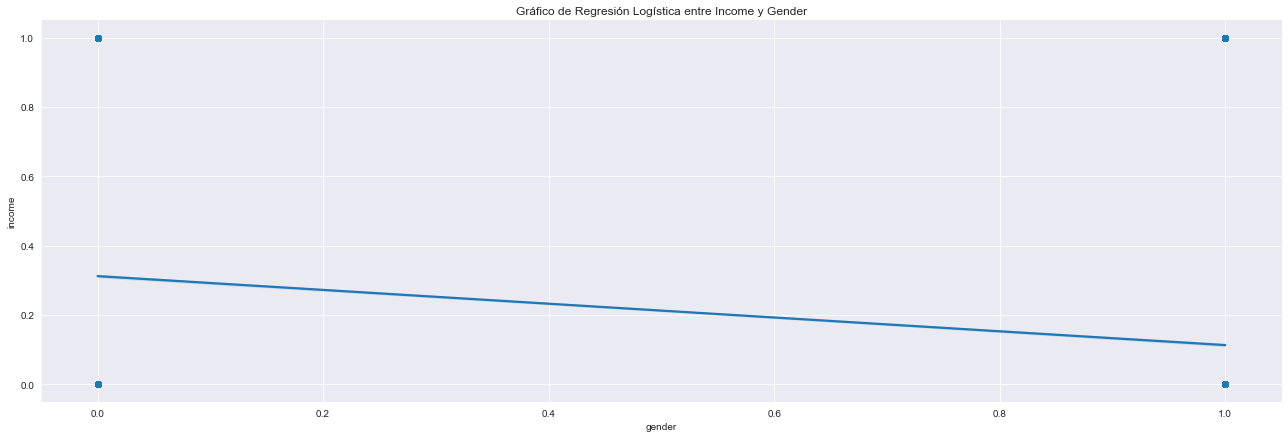

In [44]:
df_recod_drop = df_recod.dropna() # Dropeamos valores nulos

ode = OrdinalEncoder(encoding_method='arbitrary') # Para poder modelar, debemos realizar un OrdinalEncoder, ya que no nos dejaría gráficar si las variables no son númericas
df_recod_ode = ode.fit_transform(df_recod_drop)

plt.figure(figsize=(16,8))
sns.lmplot(data=df_recod_ode, x='gender', y='income', height=6, aspect=3);
plt.title('Gráfico de Regresión Logística entre Income y Gender')

ode.encoder_dict_['gender'] # Obtenemos diccionario para diferencias la Clase 1 y 0. Clase 0: Hombre, Clase 1: Mujer

**Comentarios**:

Mediante el gráfico, podemos decir que el ser mujer u hombre, estaría afectando en la probabilidad de generar ingresos anuales mayores a 50.000 dólares, si nos guiamos por el diccionario que nos entrega ode.encoder_dict_['gender'] el ser mujer estaría disminuyendo esta probabilidad, por lo que podemos establecer una desigualdad de género.

# **4- Modelación Descriptiva**

En esta sección, inspeccionaremos el modelo logístico y describiremos como las variables atributos afectan en la probabilidad de que un individuo tenga un ingreso anual mayor o inferior a 50.000 dólares anuales. Además, mediremos los modelos a través de las bondades de ajuste AIC y BIC, donde buscamos valores mejores para los dos.

>Recordatorio de clases

>Clase 0: Ingreso inferior a 50.000 dólares anuales.

>Clase 1: Ingreso superior a 50.000 dólares anuales.

#### 4.1 Estrategia para modelar.

Para realizar la modelación descriptiva, tendremos que tratar los datos perdidos y variables categóricas, ya que generan error en la modelación, además de un escalamiento en los números. La estragia será la siguiente:

* Datos perdidos: Los datos perdidos en las variables categóricas serán imputadas por la moda y las variables continuas por la media.

* Variables categóricas: Serán transformadas en valores númericos con OrdinalEncoder y el método será arbitrario.

* Escalamiento de números: Utilizaremos un StandarEscaler, al cual le aplicaremos un SklearTransformerWrapper.


In [45]:
X = df_recod.drop(columns=['income'])
y = df_recod['income']

pipe = Pipeline(steps=[
    ('ci', CategoricalImputer(imputation_method='frequent')), # Imputamos por moda
    ('mmi', MeanMedianImputer(imputation_method='mean')), # Imputamos por media
    ('ode', OrdinalEncoder(encoding_method='arbitrary')),
    ('sc', SklearnTransformerWrapper(StandardScaler()))
])

X_transform = sm.add_constant(pipe.fit_transform(X))

modelo_descriptivo = sm.Logit(y, X_transform).fit()

modelo_descriptivo.summary()

Optimization terminated successfully.
         Current function value: 0.391339
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                48842
Model:                          Logit   Df Residuals:                    48827
Method:                           MLE   Df Model:                           14
Date:                Fri, 05 Aug 2022   Pseudo R-squ.:                  0.2888
Time:                        12:14:06   Log-Likelihood:                -19114.
converged:                       True   LL-Null:                       -26875.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.4330      0.016    -88.589      0.000      -1.465      -1.401
age                 0.5884      0.015     39.609      0.000       0.559       0.618
workclass_recod     0.0282      0.012      2.313      0.021       0.004       0.052
fnlwgt              0.0516      0.013      3.945      0.000       0.026       0.077
educ_recod          0.0661      0.023      2.852      0.004       0.021       0.112
educational-num     0.7896      0.025     31.288      0.000       0.740       0.839
civstatus          -0.0954      0.016     -6.053      0.000      -0.126      -0.065
occupation          0.0046      0.015      0.303      0.762      -0.025       0.034
relationship        0.0414      0.017      2.372      0.018       0.007       0.076
race                0.0378      0.014      2.612      0.009       0.009       0.066
gender             -0.5517      0.018    -30.561      0.000      -0.587      -0.516
capital-gain        2.3767      0.060     39.481      0.000       2.259       2.495
capital-loss        0.2665      0.011     24.598      0.000       0.245       0.288
hours-per-week      0.4173      0.014     30.471      0.000       0.390       0.444
region             -0.0183      0.013     -1.425      0.154      -0.044       0.007
===================================================================================
"""

**Interpretación del modelo descriptivo**

Antes de realizar la interpretación de coeficientes, depuraremos el modelo quitando las variables atributos que tengan un p-value mayor a 0.05, esto porque si aplicamos un test de hipótesis con un nivel de significancia al 95% la hipótesis nula sería que la variable no está siendo significativa dentro del modelo, por lo tanto, buscamos rechazar la hipótesis nula buscando variables con un pvalue menor al 0.05. Si nos fijamos en el sumario, el único atributo con un p-value superior al 0.05 de significancia, es occupation, por lo que armaremos un segundo modelo dejando esta columna fuera.

In [46]:
X = df_recod.drop(columns=['income','occupation','region'])
y = df_recod['income']

pipe = Pipeline(steps=[
    ('ci', CategoricalImputer(imputation_method='frequent')), # Imputamos por moda
    ('mmi', MeanMedianImputer(imputation_method='mean')), # Imputamos por mediana
    ('ode', OrdinalEncoder(encoding_method='arbitrary')),
    ('sc', SklearnTransformerWrapper(StandardScaler()))
])

X_transform = sm.add_constant(pipe.fit_transform(X))

modelo_descriptivo_pvalue = sm.Logit(y, X_transform).fit()

modelo_descriptivo_pvalue.summary()

Optimization terminated successfully.
         Current function value: 0.391360
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                48842
Model:                          Logit   Df Residuals:                    48829
Method:                           MLE   Df Model:                           12
Date:                Fri, 05 Aug 2022   Pseudo R-squ.:                  0.2888
Time:                        12:14:06   Log-Likelihood:                -19115.
converged:                       True   LL-Null:                       -26875.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.4330      0.016    -88.783      0.000      -1.465      -1.401
age                 0.5885      0.015     39.628      0.000       0.559       0.618
workclass_recod     0.0284      0.012      2.327      0.020       0.004       0.052
fnlwgt              0.0512      0.013      3.918      0.000       0.026       0.077
educ_recod          0.0662      0.023      2.871      0.004       0.021       0.111
educational-num     0.7892      0.025     31.413      0.000       0.740       0.838
civstatus          -0.0951      0.016     -6.040      0.000      -0.126      -0.064
relationship        0.0406      0.017      2.326      0.020       0.006       0.075
race                0.0318      0.014      2.289      0.022       0.005       0.059
gender             -0.5503      0.018    -31.109      0.000      -0.585      -0.516
capital-gain        2.3770      0.060     39.492      0.000       2.259       2.495
capital-loss        0.2665      0.011     24.595      0.000       0.245       0.288
hours-per-week      0.4172      0.014     30.525      0.000       0.390       0.444
===================================================================================
"""

In [47]:
print(f'AIC modelo base: {modelo_descriptivo.aic}')
print(f'BIC modelo base: {modelo_descriptivo.bic}')
print('---------------------------------------')
print(f'AIC modelo depurado: {modelo_descriptivo_pvalue.aic}')
print(f'AIC modelo depurado: {modelo_descriptivo_pvalue.bic}')

AIC modelo base: 38257.52760268679
BIC modelo base: 38389.472790848195
---------------------------------------
AIC modelo depurado: 38255.64394796612
AIC modelo depurado: 38369.99644437267


**Comentarios:**

> Si comparamos los modelos, al quitar las variables que no son significativas el modelo presentó una leve mejora.

Con nuestro modelo depurado, procederemos a interpretar los coeficientes del modelo logístico. Estos representan el logaritmo de chance, por lo que nos referiremos a los valores como Log-odds. Para analizarlas de una manera más eficiente, separaremos los valores negativos de los positivos, estableciendo que valores restan log-odd y que valores suman.

* Atributos con valores Log-odds positivos: age, educ_recod, educational-num, civstatus, workclass_recod, relationship, race, gender, capital-gain, capital-loss, hours-per-week, region.

* Atributos con valores Log-odds negativos: gender, civstatus y la constante.

Ya con las variables separadas, interpretaremos que las variables positivas al aumentar, a su vez, están aumentando la probabilidad de que ocurra la Clase 1 y que las variables atributos con valores Log-odds negativos al sumar en una unidad estarían disminuyendo la probabilidad que ocurra la Clase 1. Para confirmar este análisis, dividiremos los coeficientes por 4 y así, de esta manera, saber cuanto porcentaje están sumando y cuanto están restando. Esto porque b1/4 es la diferencia máxima de Pr(y = 1|x) y al dividir los coeficientes por 4, obtenemos una aproximación razonable al coeficiente estimado en un modelo LPM.

Para un análisis más expedito utilizaremos código, en el cual tendremos un diccionario con el valor de los coeficientes y posteriormente un for que lo recorra, a su vez este dividirá los coeficientes en 4 y discriminará si el valor es positivo o negativo.

In [48]:
dict_pvalue = {
    'const':-1.4335,
    'age':0.5886,
    'workclass_recod':0.0283,
    'fnlwgt':0.0518,
    'educ_recod':0.0669,
    'educational-num':0.7905,
    'civstatus':-0.0957,
    'relationship':0.0418,
    'race':0.0397,
    'gender':-0.5507,
    'capital-gain':2.3762,
    'capital-loss':0.2666,
    'hours-per-week':0.4170
}

for key,item in dict_pvalue.items():
    res = (item/4)*100
    if res > 0:
        print(f'Variable atributo {key} aumenta en {res:.2f}% la probabilidad de que ocurra la clase 1')
    else:
        print(f'Variable atributo {key} disminuye en {-res:.2f}% la probabilidad de que ocurra la clase 1')

Variable atributo const disminuye en 35.84% la probabilidad de que ocurra la clase 1
Variable atributo age aumenta en 14.71% la probabilidad de que ocurra la clase 1
Variable atributo workclass_recod aumenta en 0.71% la probabilidad de que ocurra la clase 1
Variable atributo fnlwgt aumenta en 1.29% la probabilidad de que ocurra la clase 1
Variable atributo educ_recod aumenta en 1.67% la probabilidad de que ocurra la clase 1
Variable atributo educational-num aumenta en 19.76% la probabilidad de que ocurra la clase 1
Variable atributo civstatus disminuye en 2.39% la probabilidad de que ocurra la clase 1
Variable atributo relationship aumenta en 1.04% la probabilidad de que ocurra la clase 1
Variable atributo race aumenta en 0.99% la probabilidad de que ocurra la clase 1
Variable atributo gender disminuye en 13.77% la probabilidad de que ocurra la clase 1
Variable atributo capital-gain aumenta en 59.40% la probabilidad de que ocurra la clase 1
Variable atributo capital-loss aumenta en 6.6

# **5- Modelación Predictiva**

Para obtener el modelo predictivo utilizaremos el método LogisticRegression() de la librería sklearn, esto por ser un modelo de clasificación. En cuanto a las métricas, mediremos el desempeño de nuestros modelos a través del Accuracy, el cuál lo obtendremos con el método de validación cruzada KFold y con 10 particiones en cada modelo, para posteriormente comparar la media de todos los modelos y elegir el que tiene mejor Accuracy.

> **No utilizamos LeaveOneOut por la cantidad de datos en el Dataset**

In [49]:
print(f'Cantidad de datos: {df_recod.shape[0]}')

Cantidad de datos: 48842


**Inspeccionamos el balance de clases en nuestra variable objetivo**

>Recordatorio de Clases

>Clase 0: Ingreso inferior a 50.000 dólares anuales.

>Clase 1: Ingreso superior a 50.000 dólares anuales.

In [50]:
df_recod['income'].value_counts(normalize=True)

0    0.760718
1    0.239282
Name: income, dtype: float64

In [51]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

**Comentarios:**

Existe un claro desbalance en las clases, siendo que la Clase 0 supera a la Clase 1 en un 53%, más de la mitad de la data. Esto podría afectar en que el desempeño para predecir la Clase 0 será superior a la Clase 1.

#### **5.1 Modelo 1**

El primer modelo será de base, en el cual dropeamos todos los valores nulos y solamente aplicamos un Ordinal Encoder para que pueda ser procesado por el método. Generamos este modelo para ir comparando los resultados en medida que modificamos la data.

In [52]:
df_recod_drop = df_recod.dropna()

X = df_recod_drop.drop(columns=['income'])
y = df_recod_drop['income']

ode = OrdinalEncoder(encoding_method='arbitrary')
X_ode = ode.fit_transform(X)

lr = LogisticRegression(random_state=10)

modelo1_base = cross_val_score(lr, X_ode, y, cv=10, scoring='accuracy').mean()

print(f'Accuracy Modelo base: {modelo1_base:.2f}')

Accuracy Modelo base: 0.79


#### **5.2 Modelo 2**

En el segundo modelo, aplicamos escalamiento a los valores numéricos, imputamos los valores perdidos según si es categórica o numérica y las variables categóricas las transformamos en números sin ningún tipo de discriminación. 

In [53]:
X = df_recod.drop(columns=['income'])
y = df_recod['income']

pipe_scalar_impt = Pipeline(steps=[
    ('ci', CategoricalImputer(imputation_method='frequent')), #Imputar por la moda.
    ('mmi', MeanMedianImputer(imputation_method='median')), # Imputar por la media.   
    ('ode', OrdinalEncoder(encoding_method='arbitrary')),
    ('sc', SklearnTransformerWrapper(StandardScaler())),
    ('lr', LogisticRegression(random_state=10))
])

# Queremos medir la performance de una manera más robusta, entonces utilizaremos el cross val score
#model5 = 
modelo2_prepro = cross_val_score(pipe_scalar_impt, X, y, cv=10, scoring='accuracy').mean()

print(f'Accuracy Modelo 2: {modelo2_prepro:.2f}')

Accuracy Modelo 2: 0.82


#### **5.3 Modelo full**

En el tercer modelo, aplicamos los mismos pasos del anterior, con la única diferencia que discriminamos las variables categóricas, aplicando OrdinalEncoder a las variables categóricas que a nuestro criterio las consideramos Categóricas Ordinales y OneHotEncoder a las que consideramos Categóricas Nominales.

In [54]:
X = df_recod.drop(columns=['income'])
y = df_recod['income']

pipe_full = Pipeline(steps=[
    ('ci', CategoricalImputer(imputation_method='frequent')), #Imputar por la moda.
    ('mmi', MeanMedianImputer(imputation_method='mean')), # Imputar por la media.   
    ('ode', OrdinalEncoder(encoding_method='ordered',variables=['occupation','workclass_recod','educ_recod'])),
    ('ohe',OneHotEncoder(variables=['gender','civstatus','race','region','relationship'])),
    ('sc', StandardScaler()),
    ('lr', LogisticRegression(random_state=10))
])

modelo3_discr = cross_val_score(pipe_full, X, y, cv=10, scoring='accuracy').mean()
modelo3_auc = cross_val_score(pipe_full, X, y, cv=10, scoring='roc_auc').mean() # Obtenemos el Área bajo la curva ya que fue el modelo ganador

print(f'Accuracy Modelo 3: {modelo3_discr:.2f}')
print(f'Área bajo la curva ROC: {modelo3_auc:.2f}')

Accuracy Modelo 3: 0.85
Área bajo la curva ROC: 0.90


#### **5.4 Eligimos el mejor modelo**

Ya con nuestros 3 modelos armados y con el puntaje Acurracy de cada uno, procedemos a elegir el que tenga mayor puntaje.

In [55]:
print(f'Accuracy Modelo base: {modelo1_base:.2f}')
print(f'Accuracy Modelo 2: {modelo2_prepro:.2f}')
print(f'Accuracy Modelo 3: {modelo3_discr:.2f}')

Accuracy Modelo base: 0.79
Accuracy Modelo 2: 0.82
Accuracy Modelo 3: 0.85


## Mejor Modelo:

> ## **Modelo 3**

Superando por 0.05 porciento al modelo base y por 0.02 al modelo 2 en cuanto a Acurracy, elegimos como mejor modelo al **tres** y observando el Área bajo la curva ROC, el cuál fue de un 0.90, el modelo ganador tiene un desempeño del 44% superior a un mecanismo de clasificación aleatoria.

Los pasos que realizamos en este modelo fueron:

> Imputación de variables categóricas por la moda

> Imputación de variables continuas por la media

> OrdinalEncoder a las variables categóricas que consideramos que tienen un orden en la información.

> OneHotEncoder a las variables categóricas que consideramos nominales.

> Escalamiento de valores numéricos.

Concluimos que establecer un orden en las categorias tiene relevancia dentro de los modelos, ya que el modelo interpretará de mejor forma si ciertos parámetros con respecto a las categorias son mejores que otros y adaptará las probabilidades a estas. Por otra parte, el escalamiento también muestra relevancia al momento de modelar, ya que nuestros modelos interpretarán mejor los valores si se encuentran dentro de los mismos escalares y no disparados, por ejemplo si tenemos columnas con valores de edades que van desde 17 a 60 y otras con valores en dólares de 10.000 hasta 100.000 dólares, a los modelos les costará interpretar estas grandes diferencias de números y por esto mismo es recomendable realizar este procesamiento.

---